In [1]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from gym.spaces import Box, Discrete, Dict
import matplotlib.pyplot as plt
from gym import Env
import numpy as np
import random

In [12]:
class AV_environment(Env):
    def __init__(self):
        self.posX_limits = (-10, 10)
        self.posY_limits = (  0,100)
        self.vel_limits =  (  1,  5)
        self.max_tor = 100
        self.car_init_pos = 3
        self.init_pos = (0,0)
        self.path = []
        self.action_space = Box(low=np.array([0.0]), high=np.array([self.max_tor]), dtype=np.float64) # robot torque [tao]
        self.observation_space = Dict({"position": Box(low=np.array([self.posX_limits[0], self.posY_limits[0]]), high=np.array([self.posX_limits[1], self.posY_limits[1]]), shape=(2,), dtype=np.float64), "velocity": Box(low=np.array([self.vel_limits[0]]), high=np.array([self.vel_limits[1]]), dtype=np.float64)}) # pedestrian position [y,theta, v]

    def reset(self):
        init_observation = self.observation_space.sample()
        self.init_pos = tuple(init_observation["position"])
        return init_observation

    def path_generator(self, ptype ="random", size = 4, step_size = 5):
        self.path = []
        self.path.append(self.init_pos)
        increments = []
        if (ptype == "random"):
            for i in range(0,size):
                theta = random.uniform(0, 2*np.pi)
                increments.append((step_size*np.cos(theta), step_size*np.sin(theta)))

        elif (ptype == "forward"):
            theta = random.uniform(0, 2*np.pi)
            for i in range(0,size):
                increments.append((step_size*np.cos(theta), step_size*np.sin(theta)))

        elif (ptype == "curve"):
            theta = random.uniform(0, 2*np.pi)
            for i in range(0,size):
                increments.append((step_size*np.cos(theta-0.3*(i+1)), step_size*np.sin(theta-0.3*(i+1))))

        for i in range(0,size-1):
            listp = []
            listp.append(self.path[i])
            listp.append(increments[i])
            self.path.append(tuple([sum(tup) for tup in zip(*listp)]))

        self.init_pos = self.path[-1]

    def getImage(self,path):
        return OffsetImage(plt.imread(path, format="png"), zoom=0.2)

    def render(self):
        fig = plt.figure()
        ax = plt.axes()
        y = [0, self.posY_limits[1]]
        x = [0,0]
        plt.plot(x, y, linestyle='--', linewidth=3, color='black')
        plt.xlim([-20, 20])
        plt.rcParams["figure.figsize"] = (5,10)
        car = AnnotationBbox( self.getImage('/home/jhermosilla/GitHub/reinforcement_learning/project/imgs/car.png'), (0, self.car_init_pos), frameon=False)
        equis = []
        yes = []
        for i in self.path:
            pedestrian = AnnotationBbox( self.getImage('/home/jhermosilla/GitHub/reinforcement_learning/project/imgs/pedestrian.png'), i , frameon=False)
            equis.append(i[0])
            yes.append(i[1])
            ax.add_artist(pedestrian)
        plt.plot(equis, yes, linestyle='--', linewidth=1, color='black')
        ax.add_artist(car)
        info_sim = 'Observations=%.2f\nBuffer=%.2f\n'%(4, 1)
        info_ped = 'Pedestrian state\n%.2f\n'%(4)
        plt.text(23, 90, info_sim, fontsize=14)
        plt.text(23, 80, info_ped, fontsize=14)
        plt.title('Torque control environment', fontsize=18)
        plt.show()

In [13]:
env = AV_environment()

In [14]:
env.reset()

OrderedDict([('position', array([5.29546113, 0.98611153])),
             ('velocity', array([3.76347902]))])

In [15]:
env.path_generator("curve",8)

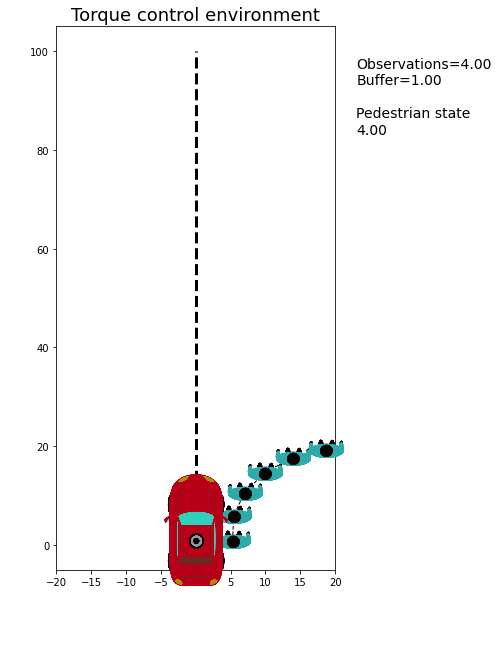

In [16]:
env.render()